# 六軸史都華平台模擬

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
sns.set()
%matplotlib inline

### Stewart Func

In [2]:
# 角度徑度轉換
sind = lambda θ : np.sin((θ/180)*np.pi) # sin(drgree)
cosd = lambda θ : np.cos((θ/180)*np.pi) # cos(drgree)

# x, y, z三軸固定軸旋轉矩陣
rotx = lambda θ : np.array([[1, 0, 0], 
                           [0, cosd(θ), -sind(θ)], 
                           [0, sind(θ), cosd(θ)]])
roty = lambda θ : np.array([[cosd(θ), 0, sind(θ)], 
                           [0, 1, 0], 
                           [-sind(θ), 0, cosd(θ)]])
rotz = lambda θ : np.array([[cosd(θ), -sind(θ), 0], 
                           [sind(θ), cosd(θ), 0], 
                           [0, 0, 1]])

# 姿勢產生器 固定座標旋轉
def poses(a, b, c):
    return rotz(c).dot(roty(b)).dot(rotx(a))

# 質心位置產生器
def posit(x, y, z):
    return np.array([x, y, z])

# Basic 6 軸點設定
def basic(r, w):
    b1 = np.array([w/2, r, 0])
    b2 = np.array([-w/2, r, 0])
    b3 = rotz(120).dot(b1)
    b4 = rotz(120).dot(b2)
    b5 = rotz(120).dot(b3)
    b6 = rotz(120).dot(b4)
    return [b1, b2, b3, b4, b5, b6]

# 平台 6 軸點設定
def plat(r, w, pos=poses(0, 0, 0), pit=posit(0, 0, 0)):
    p1 = np.array([-w/2, r, 0])
    p1 = rotz(-60).dot(p1)
    p2 = np.array([[-1, 0, 0], [0, 1, 0], [0, 0, 1]]).dot(p1)
    p3 = rotz(120).dot(p1)
    p4 = rotz(120).dot(p2)
    p5 = rotz(120).dot(p3)
    p6 = rotz(120).dot(p4)
    lst = [p1, p2, p3, p4, p5, p6]
    for n in range(6):
        lst[n] = pos.dot(lst[n]) + pit
    return lst

# 平台 座位點設定
def platseat(d, pos=poses(0, 0, 0), pit=posit(0, 0, 0)):
    s1 = np.array([2.5*d, 0, 0])
    s2 = np.array([1.5*d, 0, 0])
    s3 = np.array([0.5*d, 0, 0])
    s4 = np.array([-0.5*d, 0, 0])
    s5 = np.array([-1.5*d, 0, 0])
    s6 = np.array([-2.5*d, 0, 0])
    lst = [s1, s2, s3, s4, s5, s6]
    for n in range(6):
        lst[n] = pos.dot(lst[n]) + pit
    return lst

# 兩點長度
def leng(a ,b):
    if a.ndim == 1:
        return (((a - b)**2).sum())**0.5
    else:
        return (((a - b)**2).sum(1))**0.5
# 六軸的長度
def get_leng(bplst, pplst):
    lst = []
    for n in range(len(bplst)-1):
        lst.append(leng(bplst[n] ,pplst[n]))
    return lst

### 建立 Basic & Plane

In [3]:
baspt = basic(5, 2)
baspt.append(baspt[0])
bpx = [x[0] for x in baspt]
bpy = [y[1] for y in baspt]
bpz = [z[2] for z in baspt]

In [4]:
pos = poses(7.5, 12.5, 5)
pit = posit(0, 0, 5)

pltpt = plat(12, 2, pos, pit)
pltpt.append(pltpt[0])
ppx = [x[0] for x in pltpt]
ppy = [y[1] for y in pltpt]
ppz = [z[2] for z in pltpt]

### 上視圖

(-11.952151620342427,
 11.353873354076258,
 -12.947038257324213,
 8.620358107148029)

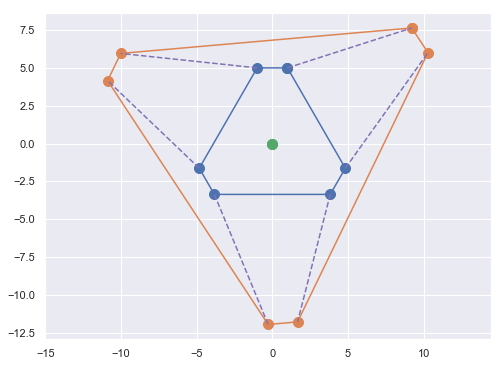

In [5]:
plt.rcParams['figure.figsize'] = [8, 6]
plt.plot(bpx, bpy, '-o', markersize=10)
plt.plot(ppx, ppy, '-o', markersize=10)
for n in range(6):
    plt.plot([bpx[n], ppx[n]], [bpy[n], ppy[n]], '--m')
plt.plot([0, pit[0]], [0, pit[1]], ':o', markersize=10)
plt.axis('equal')

### 前視圖

(-11.952151620342427,
 11.353873354076258,
 -0.4008019683071865,
 8.416841334450917)

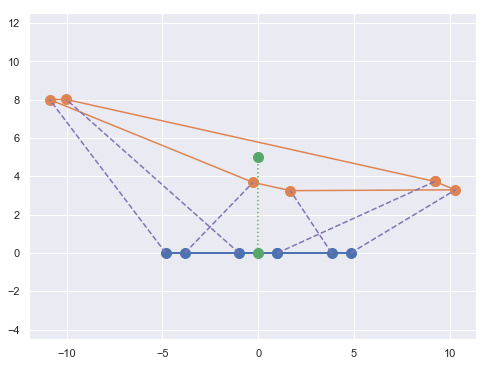

In [6]:
plt.rcParams['figure.figsize'] = [8, 6]
plt.plot(bpx, bpz, '-o', markersize=10)
plt.plot(ppx, ppz, '-o', markersize=10)
for n in range(6):
    plt.plot([bpx[n], ppx[n]], [bpz[n], ppz[n]], '--m')
plt.plot([0, pit[0]], [0, pit[2]], ':o', markersize=10)
plt.axis('equal')

### 右側視圖

(-12.947038257324213,
 8.620358107148029,
 -0.4008019683071865,
 8.416841334450917)

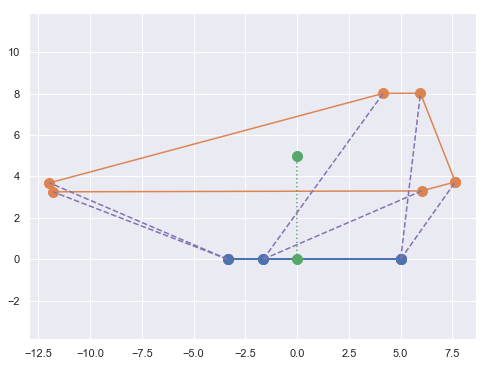

In [7]:
plt.rcParams['figure.figsize'] = [8, 6]
plt.plot(bpy, bpz, '-o', markersize=10)
plt.plot(ppy, ppz, '-o', markersize=10)
for n in range(6):
    plt.plot([bpy[n], ppy[n]], [bpz[n], ppz[n]], '--m')
plt.plot([0, pit[1]], [0, pit[2]], ':o', markersize=10)
plt.axis('equal')

### 立體圖

(0, 15)

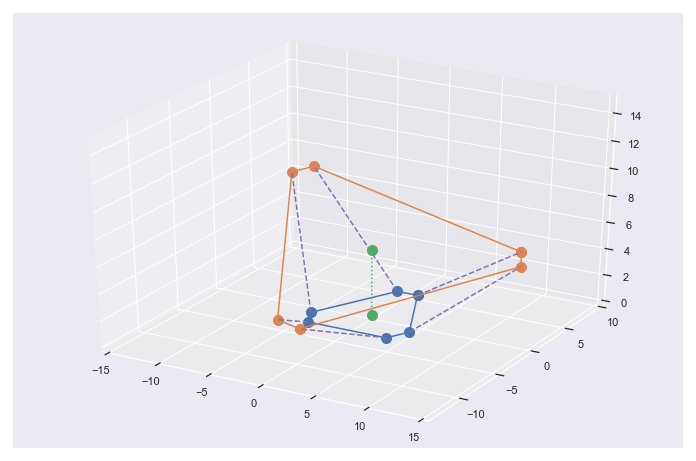

In [8]:
#%matplotlib notebook
plt.rcParams['figure.figsize'] = [12, 8]
ax = plt.axes(projection='3d')
ax.plot3D(bpx, bpy, bpz, '-o', markersize=10)
ax.plot3D(ppx, ppy, ppz, '-o', markersize=10)
for n in range(6):
    ax.plot3D([bpx[n], ppx[n]], [bpy[n], ppy[n]], [bpz[n], ppz[n]], '--m')
ax.plot3D([0, pit[0]], [0, pit[1]], [0, pit[2]], ':o', markersize=10)
ax.axis([-15, 15, -14, 10,])
ax.set_zlim(0, 15)

### 獲取六軸的長度

In [9]:
pd.DataFrame({'Length':get_leng(baspt, pltpt)}, index=['L1','L2','L3','L4','L5','L6'])

Length
L1   9.407254
L2  12.105891
L3  11.596281
L4  10.010890
L5   9.291001
L6   9.957930

### 給予姿勢和位移一個時間函數  得到六隻腳的長度變化!!

In [10]:
blst = basic(5, 2)
blst.append(blst[0])
bpx = [x[0] for x in blst]
bpy = [y[1] for y in blst]
bpz = [z[2] for z in blst]
r = 12
w = 2
h = 5
d = 5
tline = np.linspace(0, 360, 360*2+1)

In [11]:
pllst = []
seat = []
# pos pit 寫成函式
for t in tline:
    pos = poses(5*sind(t), 5*cosd(t), 3*cosd(2*t))
    pit = posit(sind(2*t), 0.8*sind(t), h + cosd(t))
    pllst.append(plat(r, w, pos, pit))
    seat.append(platseat(d, pos, pit))
pllst = np.array(pllst)
seat = np.array(seat)

leglst=[]
for n in range(6):
    leglst.append(leng(pllst[:, n, :], blst[n]))

### 六軸的長度變化

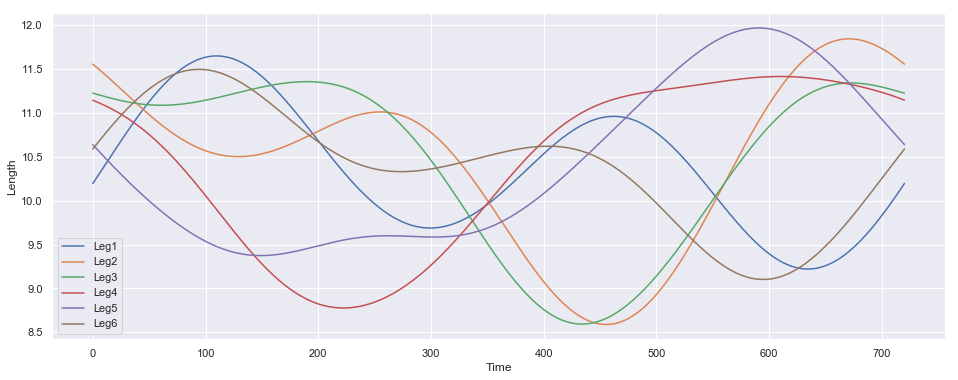

In [12]:
plt.rcParams['figure.figsize'] = [16, 6]
for n in range(6):
    plt.plot(leglst[n], label = 'Leg%d'%(n+1))
plt.ylabel('Length')
plt.xlabel('Time')
plt.legend()

### 平台動作展示

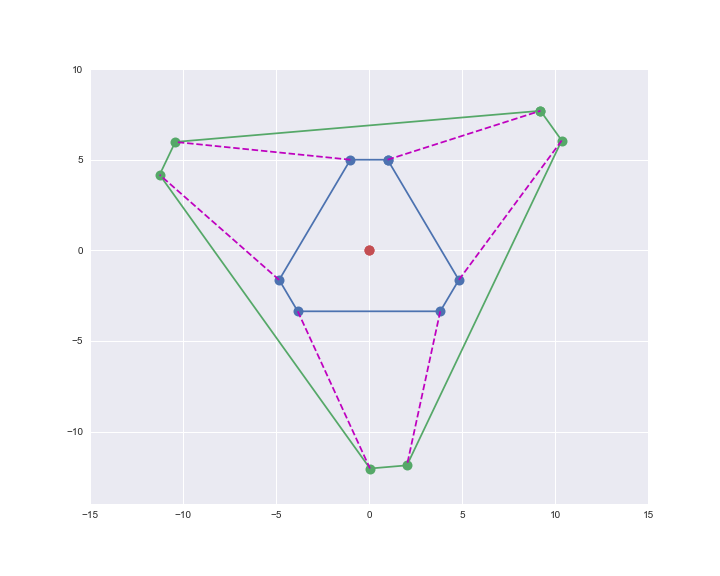

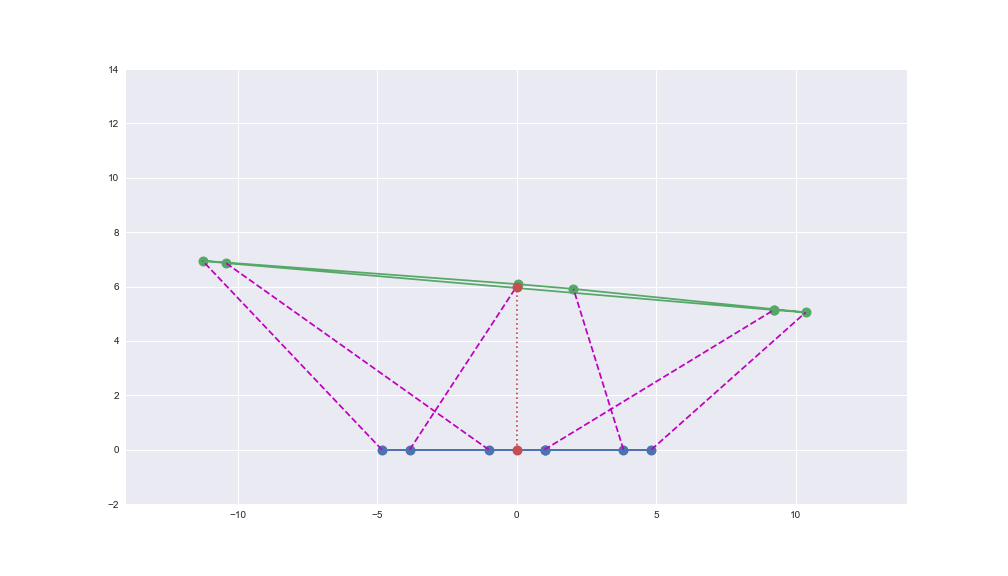

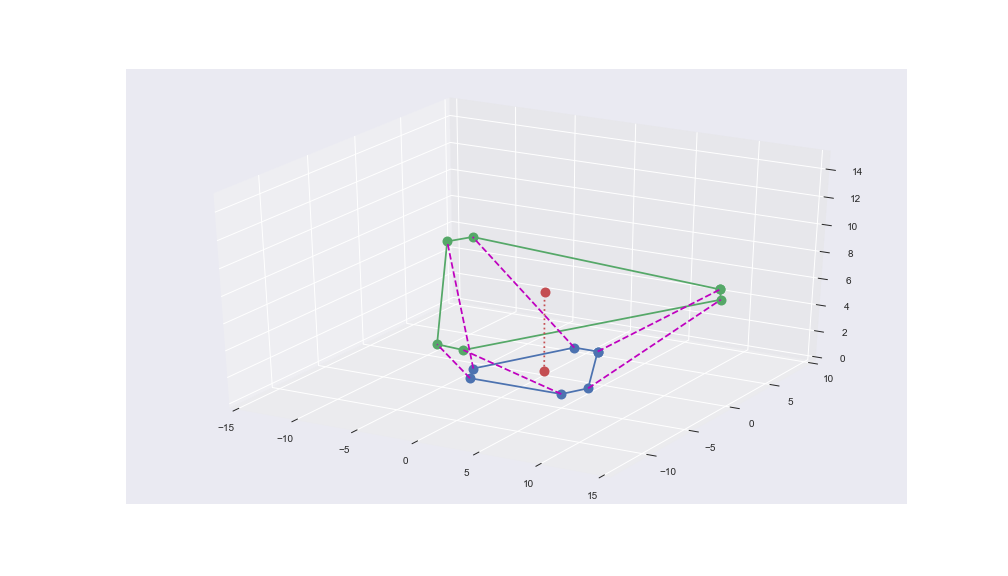

### 軌跡表現

(-13.11243325680883,
 13.122630648302405,
 -13.837228451515404,
 9.195174921140435)

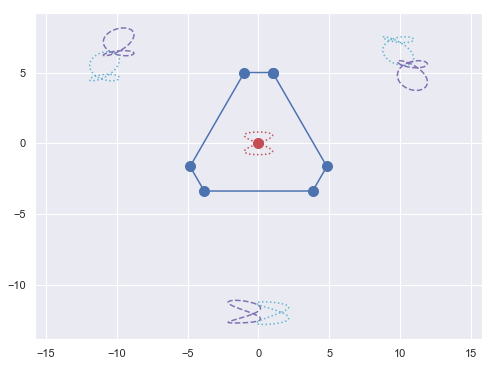

In [13]:
plt.rcParams['figure.figsize'] = [8, 6]
plt.plot(bpx, bpy, '-o', markersize=10)
plt.plot((pllst.sum(1)/6)[: ,0], (pllst.sum(1)/6)[: ,1], ':r' )
for n in range(0, 6, 2):
    plt.plot(pllst[:, n, 0], pllst[:, n, 1], ':c' )
    plt.plot(pllst[:, n+1, 0], pllst[:, n+1, 1], '--m' )
plt.plot([0], [0], 'or', markersize=10)
plt.axis('equal')

(-13.11243325680883,
 13.122630648302405,
 -0.34999190492772064,
 7.349830003482133)

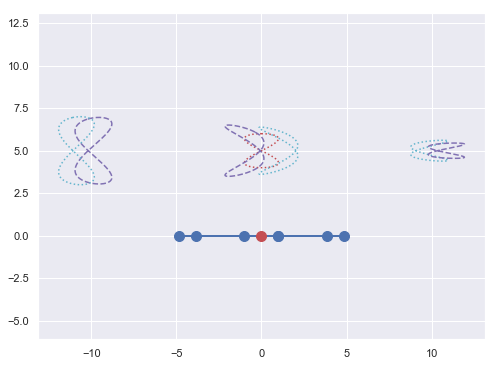

In [14]:
plt.rcParams['figure.figsize'] = [8, 6]
plt.plot(bpx, bpz, '-o', markersize=10)
plt.plot((pllst.sum(1)/6)[: ,0], (pllst.sum(1)/6)[: ,2], ':r' )
for n in range(0, 6, 2):
    plt.plot(pllst[:, n, 0], pllst[:, n, 2], ':c' )
    plt.plot(pllst[:, n+1, 0], pllst[:, n+1, 2], '--m' )
plt.plot([0], [0], 'or', markersize=10)
plt.axis('equal')

(-13.837228451515404,
 9.195174921140435,
 -0.34999190492772064,
 7.349830003482133)

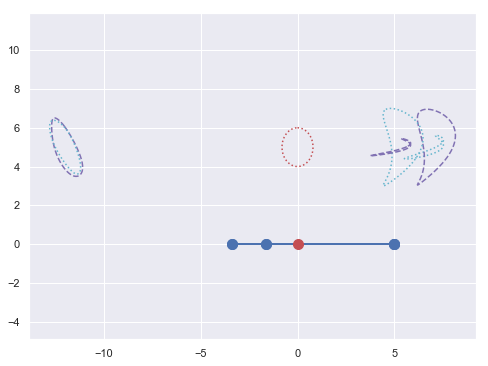

In [15]:
plt.rcParams['figure.figsize'] = [8, 6]
plt.plot(bpy, bpz, '-o', markersize=10)
plt.plot((pllst.sum(1)/6)[: ,1], (pllst.sum(1)/6)[: ,2], ':r' )
for n in range(0, 6, 2):
    plt.plot(pllst[:, n, 1], pllst[:, n, 2], ':c' )
    plt.plot(pllst[:, n+1, 1], pllst[:, n+1, 2], '--m' )
plt.plot([0], [0], 'or', markersize=10)
plt.axis('equal')

(0, 15)

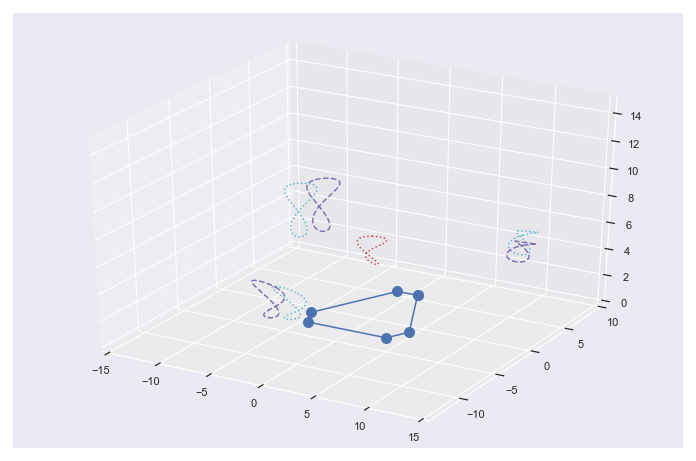

In [16]:
#%matplotlib notebook
plt.rcParams['figure.figsize'] = [12, 8]
ax = plt.axes(projection='3d')
ax.plot3D(bpx, bpy, bpz, '-o', markersize=10)
ax.plot3D((pllst.sum(1)/6)[: ,0], (pllst.sum(1)/6)[: ,1], (pllst.sum(1)/6)[: ,2], ':r' )
for n in range(0, 6, 2):
    ax.plot3D(pllst[:, n, 0], pllst[:, n, 1], pllst[:, n, 2], ':c' )
    ax.plot3D(pllst[:, n+1, 0], pllst[:, n+1, 1], pllst[:, n+1, 2], '--m' )
ax.axis([-15, 15, -14, 10,])
ax.set_zlim(0, 15)

(-14.82411356326816, 14.82411356326816, -3.784326673973662, 5.418301270189222)

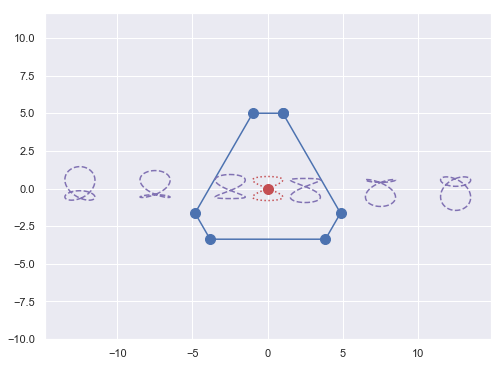

In [17]:
plt.rcParams['figure.figsize'] = [8, 6]
plt.plot(bpx, bpy, '-o', markersize=10)
plt.plot((seat.sum(1)/6)[: ,0], (seat.sum(1)/6)[: ,1], ':r' )
for n in range(6):
    plt.plot(seat[:, n, 0], seat[:, n, 1], '--m' )
plt.plot([0], [0], 'or', markersize=10)
plt.axis('equal')

### 並排座位軌跡表現

(0, 15)

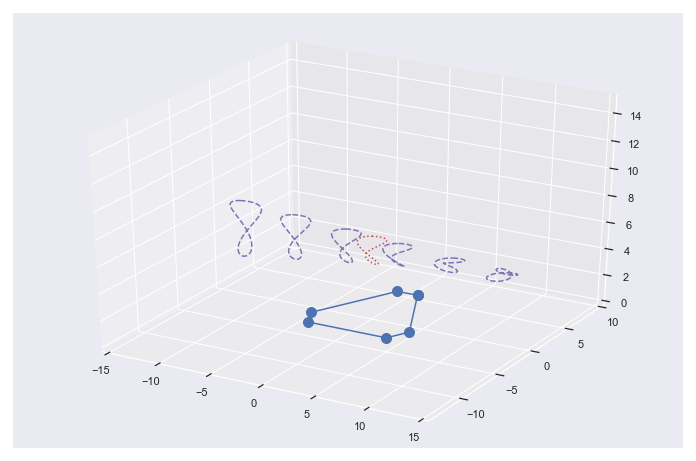

In [18]:
#%matplotlib notebook
plt.rcParams['figure.figsize'] = [12, 8]
ax = plt.axes(projection='3d')
ax.plot3D(bpx, bpy, bpz, '-o', markersize=10)
ax.plot3D((seat.sum(1)/6)[: ,0], (seat.sum(1)/6)[: ,1], (seat.sum(1)/6)[: ,2], ':r' )
for n in range(6):
    ax.plot3D(seat[:, n, 0], seat[:, n, 1], seat[:, n, 2], '--m' )
ax.axis([-15, 15, -14, 10,])
ax.set_zlim(0, 15)